# Relative Humidity Regression Prediction from Air Quality UCI Dataset - Ganesh Ram Gururajan

## Data import, cleaning and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/AirQualityUCI.csv')

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888


In [6]:
data.drop(['Date','Time'],axis=1,inplace=True)

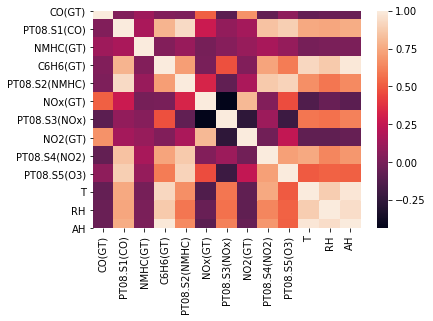

In [7]:
sns.heatmap(data.corr())

In [8]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [9]:
data.drop(['T','AH','PT08.S5(O3)','PT08.S2(NMHC)'],axis=1,inplace=True)

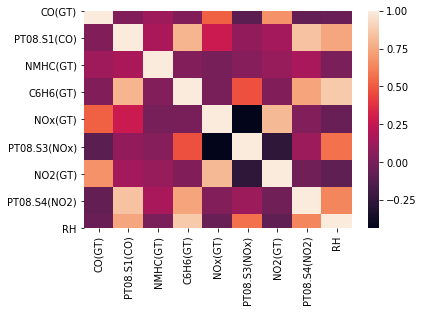

In [10]:
sns.heatmap(data.corr())

In [11]:
data.drop(['PT08.S4(NO2)','C6H6(GT)'],axis=1,inplace=True)

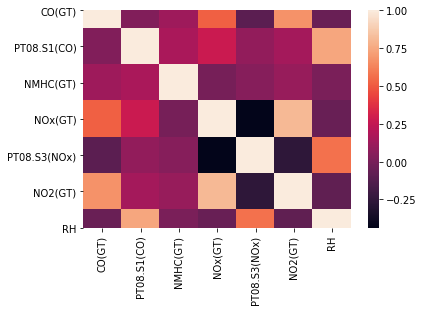

In [12]:
sns.heatmap(data.corr())

In [14]:
data.drop(['NOx(GT)','NO2(GT)'],axis=1,inplace=True)

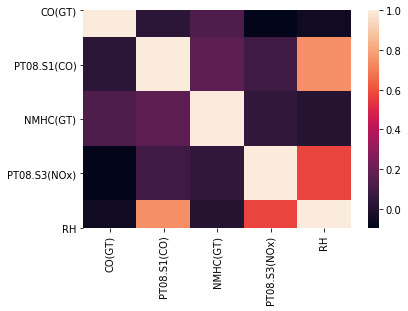

In [15]:
sns.heatmap(data.corr())

In [16]:
data.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S3(NOx),RH
0,2.6,1360,150.0,1056,48.9
1,2.0,1292,112.0,1174,47.7
2,2.2,1402,88.0,1140,54.0
3,2.2,1376,80.0,1092,60.0
4,1.6,1272,51.0,1205,59.6
5,1.2,1197,38.0,1337,59.2
6,1.2,1185,31.0,1462,56.8
7,1.0,1136,31.0,1453,60.0
8,0.9,1094,24.0,1579,59.7
9,0.6,1010,19.0,1705,60.2


In [21]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S3(NOx)', 'RH'], dtype='object')

In [17]:
data.shape

(9357, 5)

In [25]:
data.dtypes

CO(GT)          float64
PT08.S1(CO)       int64
NMHC(GT)        float64
PT08.S3(NOx)      int64
RH              float64
dtype: object

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop(['RH'],axis = 1)

In [28]:
y = data['RH']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6549, 4), (2808, 4), (6549,), (2808,))

## Machine Learning

## Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt = DecisionTreeRegressor()

In [34]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [35]:
pred1 = dt.predict(X_test)

## Decision Tree Evaluation

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
print(mean_absolute_error(y_test,pred1))

16.580436111111112


In [40]:
print(np.sqrt(mean_squared_error(y_test,pred1)))

21.96316707329118


In [39]:
print(r2_score(y_test,pred1))

0.8229374933775563


## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=100)

In [90]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
pred2 = rf.predict(X_test)

## Random Forest Evaluation

In [92]:
print(mean_absolute_error(y_test,pred2))

12.709457009734093


In [93]:
print(np.sqrt(mean_squared_error(y_test,pred2)))

16.471083476424834


In [94]:
print(r2_score(y_test,pred2))

0.9004179610937877


## AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [49]:
ada = AdaBoostRegressor()

In [50]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [51]:
pred3 = ada.predict(X_test)

## AdaBoost Evaluation

In [52]:
print(mean_absolute_error(y_test,pred3))

13.288177341585495


In [53]:
print(np.sqrt(mean_squared_error(y_test,pred3)))

16.78639424654113


In [54]:
print(r2_score(y_test,pred3))

0.8965688114838869


## XGBoost

In [55]:
from xgboost import XGBRegressor

In [56]:
xgb = XGBRegressor()

In [57]:
xgb.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:17:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [58]:
pred4 = xgb.predict(X_test)

## XGBoost Evaluation

In [59]:
print(mean_absolute_error(y_test,pred4))

12.658425377172488


In [60]:
print(np.sqrt(mean_squared_error(y_test,pred4)))

16.05916400364515


In [61]:
print(r2_score(y_test,pred4))

0.9053365029080851


## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
pred5 = lr.predict(X_test)

## Linear Regression Prediction

In [69]:
print(mean_absolute_error(y_test,pred5))

16.84810072168238


In [70]:
print(np.sqrt(mean_squared_error(y_test,pred5)))

21.02091744275686


In [71]:
print(r2_score(y_test,pred5))

0.8378040481381831


## Ridge Cross Validation Regression

In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
rcv = RidgeCV()

In [75]:
rcv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [76]:
pred6 = rcv.predict(X_test)

## RidgeCV Evaluation

In [77]:
print(mean_absolute_error(y_test,pred6))

16.84810045256527


In [78]:
print(np.sqrt(mean_squared_error(y_test,pred6)))

21.020917382614623


In [79]:
print(r2_score(y_test,pred6))

0.8378040490662898


## Lars Cross Validation Regression

In [81]:
from sklearn.linear_model import LarsCV

In [82]:
lrcv = LarsCV()

In [83]:
lrcv.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LarsCV(copy_X=True, cv='warn', eps=2.220446049250313e-16, fit_intercept=True,
       max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
       positive=False, precompute='auto', verbose=False)

In [84]:
pred7 = lrcv.predict(X_test)

## LarsCV Evaluation

In [85]:
print(mean_absolute_error(y_test,pred7))

16.84810072168236


In [86]:
print(np.sqrt(mean_squared_error(y_test,pred7)))

21.020917442756858


In [87]:
print(r2_score(y_test,pred7))

0.8378040481381832


# End